# 3. 그래프와 시각화

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)

import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

## pandas로 그래프 그리기

- Pandas의 Series와 Dataframe 객체 모두 `plot()` 메서드를 지원
-  `matplotlib.pyplot.plot()`을 이용하기에 `xticks`, `xlim` 등 옵션 사용방식 또한 거의 동일하게 사용 가능

- [pandas.Seris.plot()](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html)
- [pandas.DataFrame.plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

### 시리즈와 선그래프

- 시리즈는 하나의 선그래프를 그릴 수 있다. 
- 인덱스 : x축 좌표
- value : y축 좌표

In [5]:
se_1 = pd.Series(np.random.randn(20).cumsum(), index= np.arange(0, 200, 10))

<AxesSubplot: >

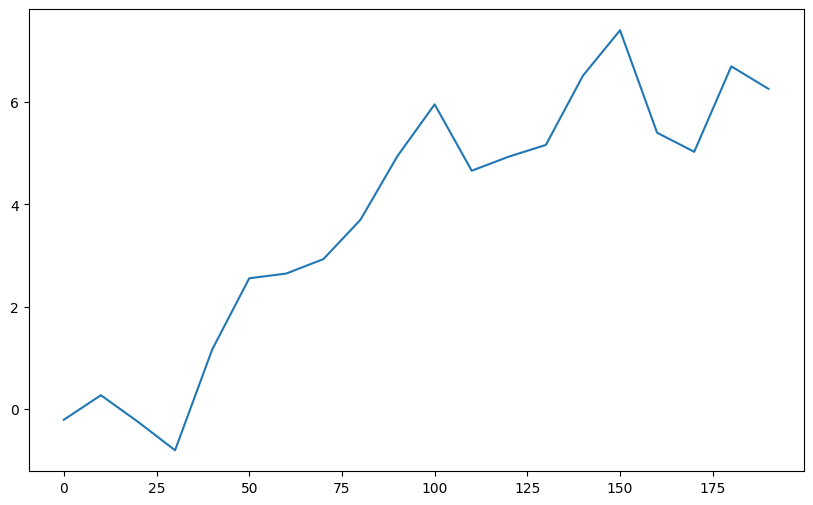

In [7]:
se_1.plot()

### 데이터프레임과 선그래프

- 데이터프레임은 특성 수만큼의 선그래프를 그릴 수 있다.
- y축 좌표는 특성별 value이며, x축 좌표는 기본적으로 index가 사용
- 특성 이름이 범례로 지정

In [8]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))

df

,A,B,C,D
0,-0.539741,0.476985,3.248944,-1.021228
10,-1.116829,0.601106,3.551557,-0.497455
20,-1.115888,1.944916,2.838013,-1.328609
30,-3.486120,0.084155,1.977256,-0.768464
40,-4.752055,0.203982,0.913744,-0.435581
50,-7.111473,0.004439,-0.628252,-1.406317
60,-8.418504,0.290789,-0.250268,-2.160203
70,-8.087218,1.640531,-0.180391,-1.913529
80,-8.099080,2.645343,1.146804,-2.832791
90,-9.648186,2.667528,1.905167,-3.493315


<AxesSubplot: >

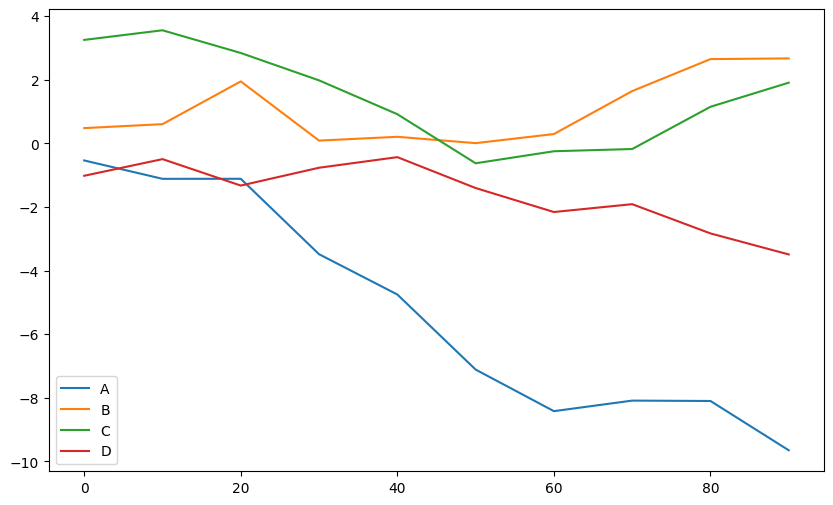

In [9]:
df.plot()

`subplots=True` 
- 각각의 그래프를 1차원 어레이 모양의 독립된 서브플롯에서 그린다.

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
      dtype=object)

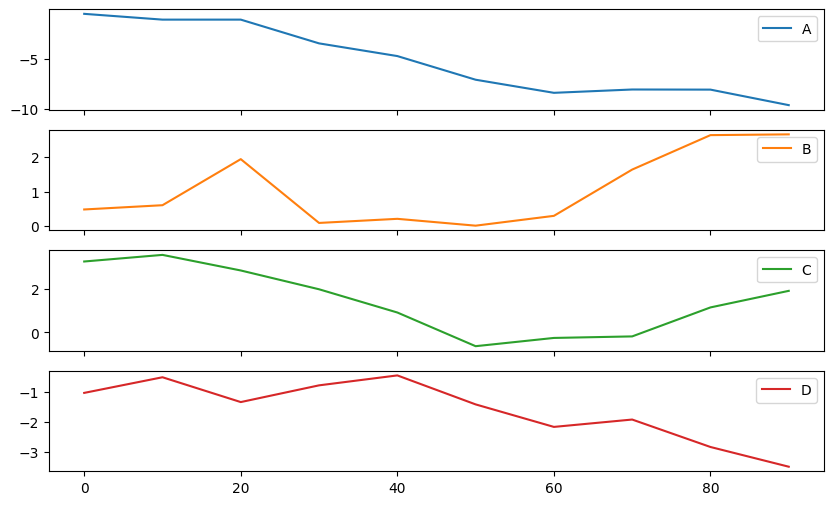

In [12]:
df.plot(subplots=True)

### 시리즈와 막대그래프

- 수직 막대그래프: `pandas.Series.plot.bar()`
- 수평 막대그래프: `pandas.Series.plot.barh()`

- 수평 막대그래프의 x축/y축 눈금은 수직 막대그래프의 y축/x축 눈금에 mapping 된다. 

In [13]:
np.random.seed(12345)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [14]:
data

a    0.929616
b    0.316376
c    0.183919
d    0.204560
e    0.567725
f    0.595545
g    0.964515
h    0.653177
i    0.748907
j    0.653570
k    0.747715
l    0.961307
m    0.008388
n    0.106444
o    0.298704
p    0.656411
dtype: float64

- 서브플롯을 지정
    - `ax=서브플롯` 옵션을 지정
    - 시리즈와 데이터프레임의 모든 그래프 함수에 사용할 수 있다. 

<AxesSubplot: >

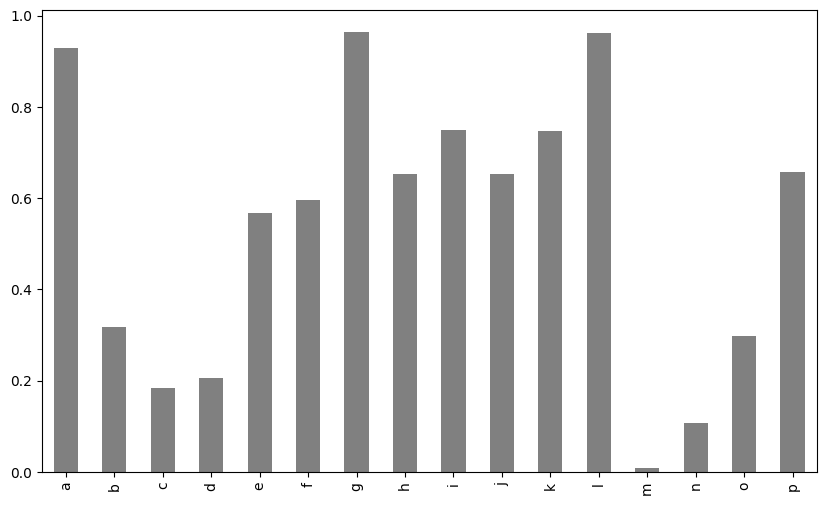

In [20]:
data.plot.bar(color="gray")

<AxesSubplot: >

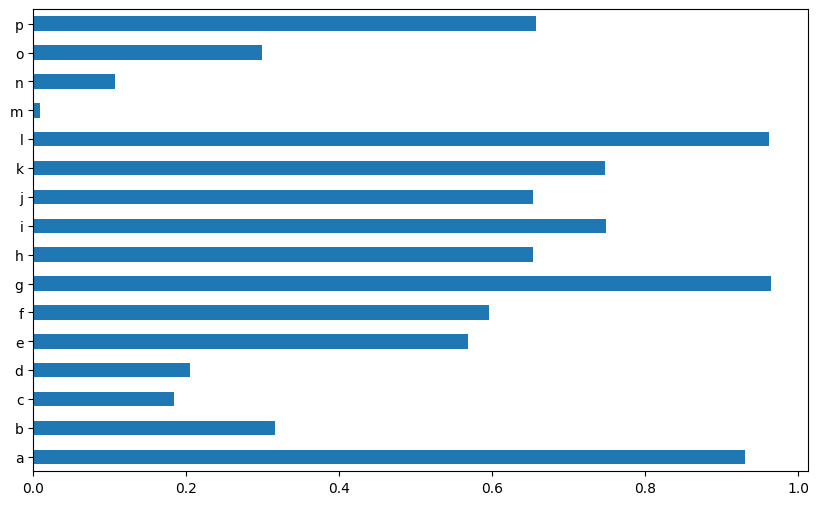

In [16]:
data.plot.barh()

#### plot() 
- `kind=bar`/`kind=barh` 옵션이 각각 수직/수평 막대그래프를 그리는 함수

### 데이터프레임과 막대그래프

- 수직 막대그래프: `pandas.DataFrame.plot.bar()`
- 수평 막대그래프: `pandas.DataFrame.plot.barh()`

수평 막대그래프의 x축/y축 눈금은 수직 막대그래프의 y축/x축 눈금에 해당한다.

- 범례 제목: 컬럼 인덱스의 이름이 주어진 경우 사용된다.
- 행별 막대그래프를 하나로 묶어서 보여준다.

<AxesSubplot: >

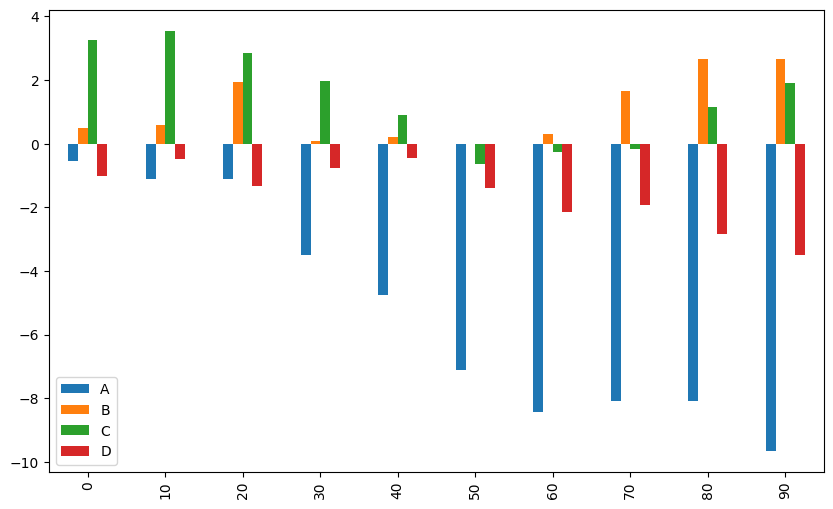

In [22]:
df.plot.bar()

<AxesSubplot: >

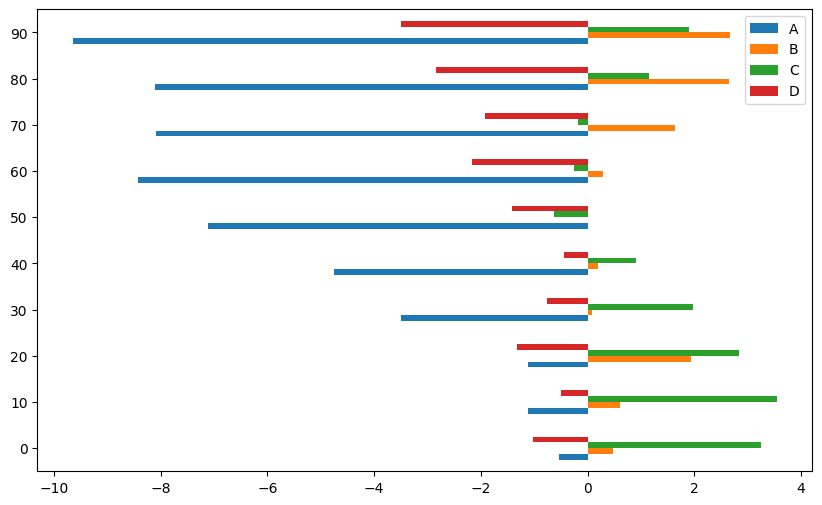

In [23]:
df.plot.barh()

#### 누적막대그래프

`stacked=True` 옵션을 사용하면 각 행의 값들이 하나의 막대에 누적 출력

<AxesSubplot: >

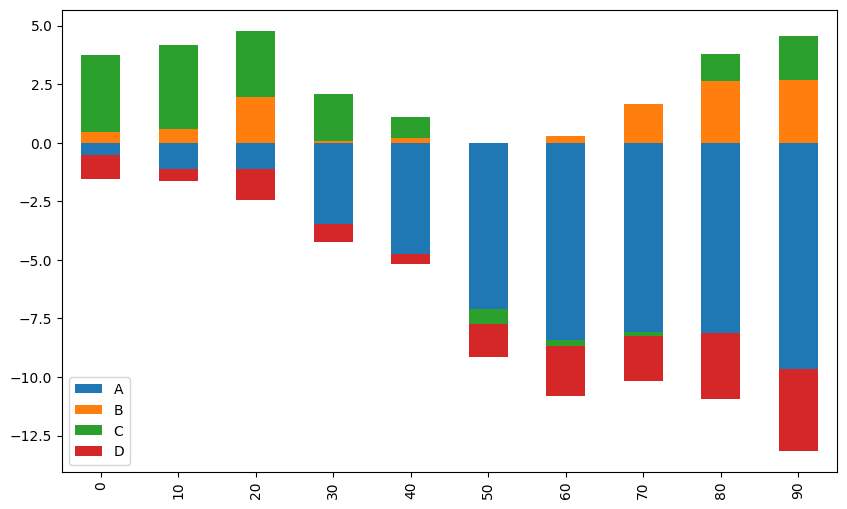

In [24]:
df.plot.bar(stacked=True)

<AxesSubplot: >

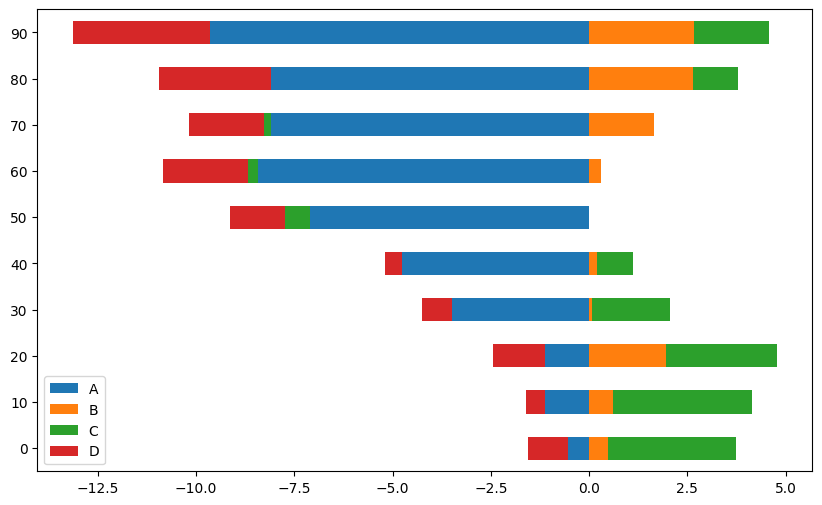

In [25]:
df.plot.barh(stacked=True)

#### plot() 메서드의 `kind=bar`와 `kind=barh` 옵션

`kind=bar`/`kind=barh` 옵션이 각각 수직/수평 막대그래프를 그리는 함수와 동일

<AxesSubplot: >

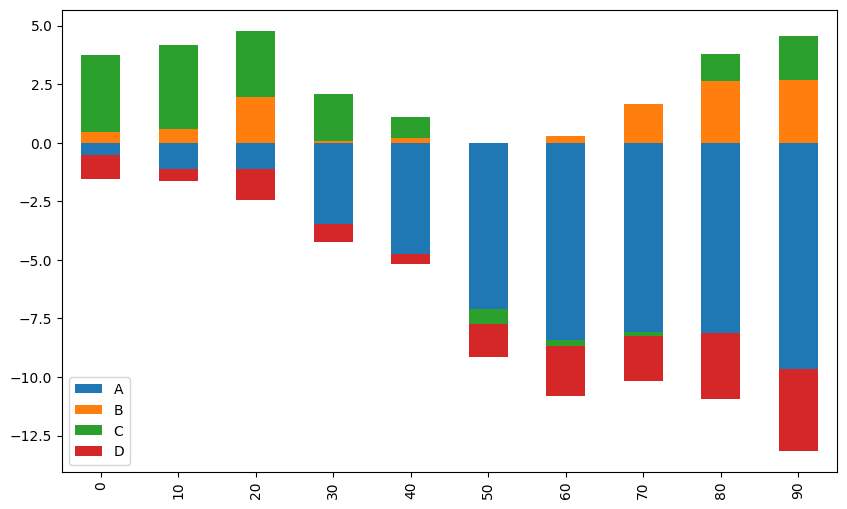

In [26]:
df.plot(kind="bar",stacked=True)

<AxesSubplot: >

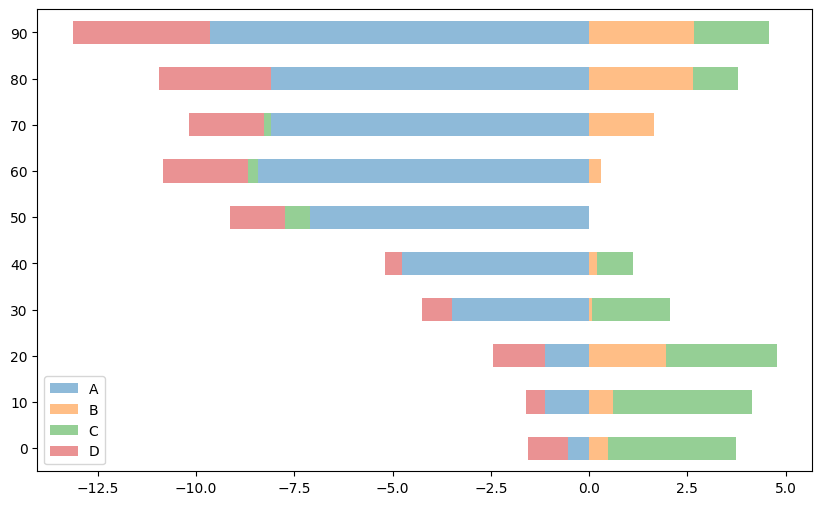

In [28]:
df.plot(kind="barh", stacked=True, alpha = 0.5)

### 예제: 서비스 팁(tip) 데이터

서비스 팁 데이터는 요일별 파티 수, 총 수입, 시간대, 팁 수입 등에 대한 정보를 담고 있다.

__참고:__ 서비스 팁 데이터를 아래처럼 불러올 수도 있다.

```python
import seaborn as sns
tips = sns.load_dataset('tips').drop('sex', axis=1)
```

In [2]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 KB 3.6 MB/s eta 0:00:00a 0:00:01


In [10]:
import seaborn as sns
tips = sns.load_dataset('tips').drop('sex', axis=1)

In [11]:
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [12]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   smoker      244 non-null    category
 3   day         244 non-null    category
 4   time        244 non-null    category
 5   size        244 non-null    int64   
dtypes: category(3), float64(2), int64(1)
memory usage: 7.0 KB


In [13]:
import pandas as pd

In [14]:
tips_path = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/tips.csv'

In [15]:
tips = pd.read_csv(tips_path)

In [16]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   smoker      244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


column별 특성

- `total_bill`: 총 수입
- `tip`: 서비스 팁
- `smoker`: 흡연 여부 
- `day`: 요일
- `time`: 시간대(점심/저녁)
- `size`: 파티 규모(참여인원 수)

범주형 데이터에 사용된 값들은 다음과 같다.

- 흡연 여부

In [17]:
tips["smoker"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 244 entries, 0 to 243
Series name: smoker
Non-Null Count  Dtype 
--------------  ----- 
244 non-null    object
dtypes: object(1)
memory usage: 2.0+ KB


In [18]:
tips["smoker"].describe()

count     244
unique      2
top        No
freq      151
Name: smoker, dtype: object

In [20]:
tips["smoker"].unique()

array(['No', 'Yes'], dtype=object)

* 요일

In [21]:
tips["day"].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

* 시간대

In [22]:
tips["time"].unique()

array(['Dinner', 'Lunch'], dtype=object)

- size 
    - 해당 파티 규모(참여인원 수)
    - 최소 1명 최대 6명이 참여


In [23]:
tips["size"].unique()

array([2, 3, 4, 1, 6, 5])

#### cross table
- 요일과 파티 규모 사이의 관계를 파악하기 위해 교차표(cross table)를 이용
- `pandas.crosstab()` 함수는 지정된 두 특성 사이의 도수분포도를 표로 생성
- [참고](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=niiceha3&logNo=220718992859)

In [25]:
party_count = pd.crosstab(tips["day"], tips["size"])

- 빈도수가 낮은 1인과 6인 파티는 제외하자.

In [26]:
party_count = party_count.loc[:, 2:5]

In [27]:
party_count

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


#### 행별 정규화(Normalization)

- column별 항목의 합이 1이 되도록 값을 정규화한다.
    - 요일별 파티 규모의 비율을 파악할 수 있다.
    - 가장 파티를 많이 하는 요일을 찾을수 있다. 

- `pandas.div()` 함수: 각 항목을 지정된 값으로 나눈다. `axis=0`는 행별로 나눗셈을 실행하도록 지정한다.

In [29]:
party_count.sum(axis = 1)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [32]:
party_pct = party_count.div(party_count.sum(axis = 1), axis=0)

In [33]:
party_pct

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


- 주말일 수록 파티 규모가 커짐을 알수 있다. 

<AxesSubplot: xlabel='day'>

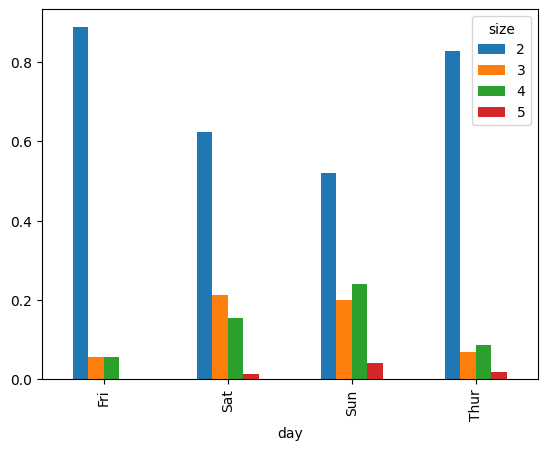

In [34]:
party_pct.plot.bar()

## seanborn으로 그래프 그리기

- seaborn 라이브러리는 matplotlib을 바탕으로 멋진 통계 관련 그래프를 그리는 API(도구)를 제공

In [35]:
# !pip install seaborn
import seaborn as sns

- 'tip_pct' column에 요일별로 총 순수수입에서 서비스 팁이 차지하는 비율을 추가하자
    - 팁 비율: 총 순수수입 $=$ 총 수입 $-$ 팁

In [37]:
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])

In [38]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,No,Sat,Dinner,2,0.108899


#### `seaborn.barplot()` 함수

- 요일별 서비스 팁의 비율의 평균값(mean)
    - 막대 끝에 위치한 검정 직선 기본적으로 신뢰도 95%의 신뢰구간을 표시하는 __오차 막대__(error bar)이다.
    - 95%의 신뢰도 다음 범주에 데이터가 존재 한다.

<AxesSubplot: xlabel='tip_pct', ylabel='day'>

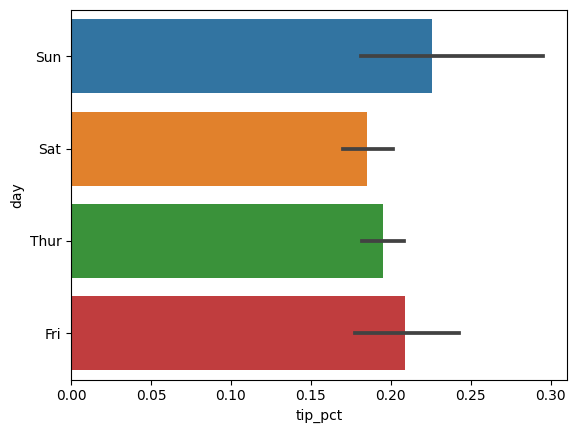

In [40]:
sns.barplot(x = "tip_pct", y = "day", data = tips)

<AxesSubplot: xlabel='tip_pct', ylabel='day'>

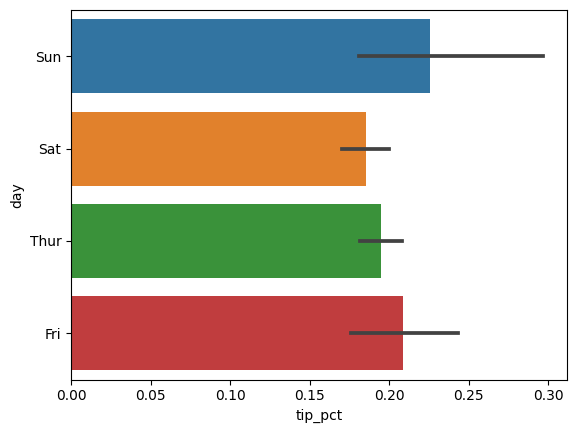

In [47]:
sns.barplot(x = "tip_pct", y = "day", data = tips,  orient="h")

- `ci` 옵션을 조절하면 신뢰구간을 다음과 같이 변경 가능
    - `ci='sd'` 옵션: 신뢰 구간 대신에 표준 편차(standard deviation) 표시.
    - `ci=None` 옵션: 검정 막대 표시하지 않음.

/tmp/ipykernel_1801/3121513335.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = "tip_pct", y = "day", data = tips,  ci = None)


<AxesSubplot: xlabel='tip_pct', ylabel='day'>

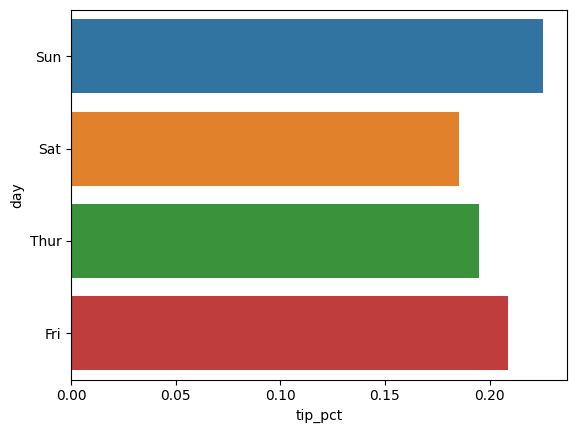

In [49]:
sns.barplot(x = "tip_pct", y = "day", data = tips,  ci = None)

* `hue='time'`: time column을 추가 기준으로 사용하면 다음 결과가 보인다.

/tmp/ipykernel_1801/510552106.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = "tip_pct", y = "day",hue = "time",  data = tips,  ci = None)


<AxesSubplot: xlabel='tip_pct', ylabel='day'>

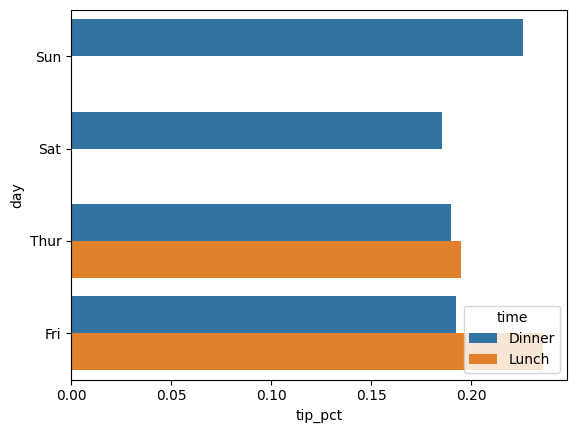

In [50]:
sns.barplot(x = "tip_pct", y = "day",hue = "time",  data = tips,  ci = None)

__참고:__ 목요일 저녁 막대에 신뢰구간이 표시되지 않는 이유는 단 한 번의 파티만 있었기 때문

<AxesSubplot: xlabel='tip_pct', ylabel='day'>

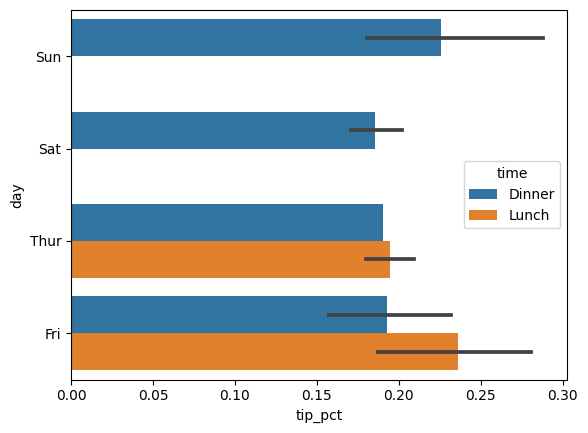

In [51]:
sns.barplot(x = "tip_pct", y = "day",hue = "time",  data = tips)

In [58]:
day_thur = tips["day"] == "Thur"

In [59]:
tips[day_thur]

,total_bill,tip,smoker,day,time,size,tip_pct
77,27.20,4.00,No,Thur,Lunch,4,0.172414
78,22.76,3.00,No,Thur,Lunch,2,0.151822
79,17.29,2.71,No,Thur,Lunch,2,0.185871
80,19.44,3.00,Yes,Thur,Lunch,2,0.182482
81,16.66,3.40,No,Thur,Lunch,2,0.256410
...,...,...,...,...,...,...,...
202,13.00,2.00,Yes,Thur,Lunch,2,0.181818
203,16.40,2.50,Yes,Thur,Lunch,2,0.179856
204,20.53,4.00,Yes,Thur,Lunch,4,0.241984
205,16.47,3.23,Yes,Thur,Lunch,3,0.243958


In [60]:
time_dinner = tips["time"] == "Dinner"

In [61]:
tips[day_thur & time_dinner]

,total_bill,tip,smoker,day,time,size,tip_pct
243,18.78,3.0,No,Thur,Dinner,2,0.190114


### seaborn 기본 설정

`seaborn.set_theme()` 함수를 이용하여 다양한 설정을 지정가능

```python
seaborn.set_theme(context='notebook', 
                  style='darkgrid', 
                  palette='deep', 
                  font='sans-serif', 
                  font_scale=1, 
                  color_codes=True, 
                  rc=None)
```

In [63]:
sns.set_theme(style="darkgrid")
# style의 종류는?
# https://seaborn.pydata.org/generated/seaborn.set_theme.html

지정된 설정은 모든 그래프에 영향을 준다.

<AxesSubplot: xlabel='tip_pct', ylabel='day'>

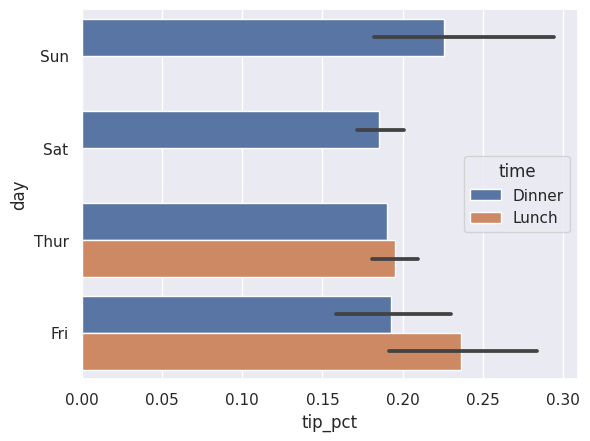

In [64]:
sns.barplot(x = "tip_pct", y = "day",hue = "time",  data = tips)

### 히스토그램과 밀도그래프

- 아래 pandas의 `plot()` 함수를 이용하여 히스토그램을 그리는 것을 보여준다.
- 사용되는 date는 요일별 팁의 비율이다. (최고 2.5% )

In [68]:
import matplotlib.pyplot as plt

(-0.5, 1.0)

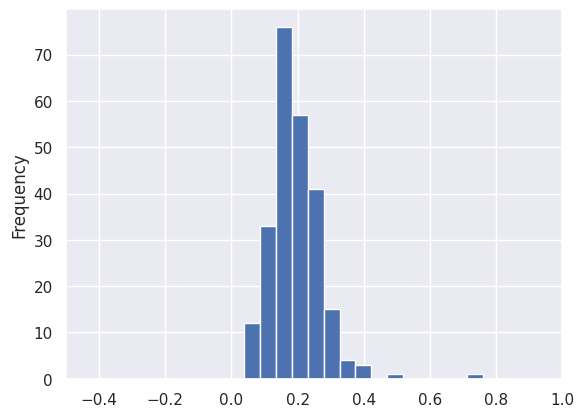

In [69]:
tips["tip_pct"].plot.hist(bins=50)
plt.xlim([-0.5, 1.0])

- `pandas.plot.density()` 함수는 히스토그램에 대한 추정 연속확률밀도 함수의 그래프를 그린다.

In [75]:
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 22.1 MB/s eta 0:00:0000:0100:01


<AxesSubplot: ylabel='Density'>

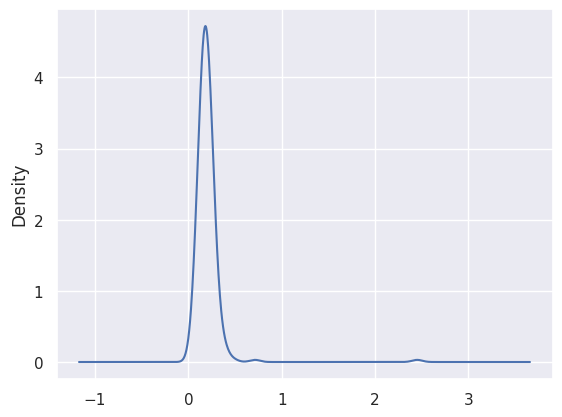

In [76]:
tips["tip_pct"].plot.density()

- seaborn 라이브러리를 이용하여 히스토그램과 밀도그래프를 함께 그릴 수도 있다.
    - `seaborn.histplot()` 또는 `seaborn.displot()` 함수를 `kde=True` (커널 밀도 추정) 옵션과 함께 사용가능

#### `seaborn.histplot()` 함수

In [78]:
import numpy as np

In [79]:
np.random.seed(12345)

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)

values = pd.Series(np.concatenate([comp1, comp2]))

<AxesSubplot: ylabel='Count'>

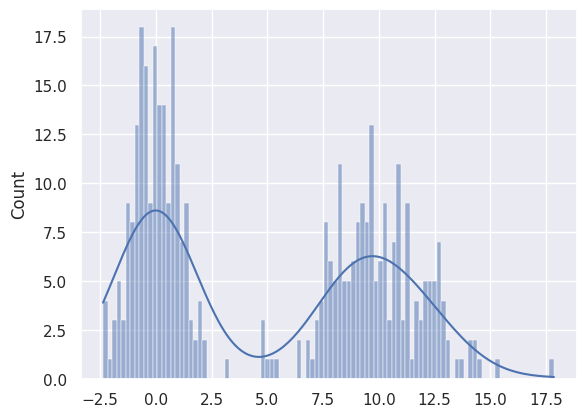

In [85]:
sns.histplot(values, bins=100, kde = True)

#### `seaborn.displot()` 함수

`seaborn.displot()` 사용할 경우 사이즈와 가로세로의 기본 비율이 다르다.

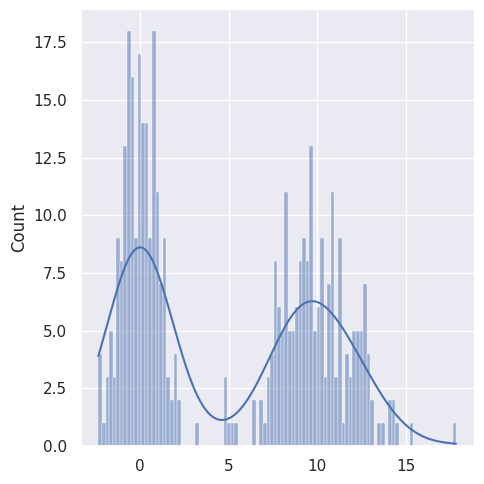

In [84]:
sns.displot(values, bins=100, kde = True)

하지만 `height`와 `aspect` 옵션을 이용하면 적절한 크기와 비율로 맞출 수 있다.

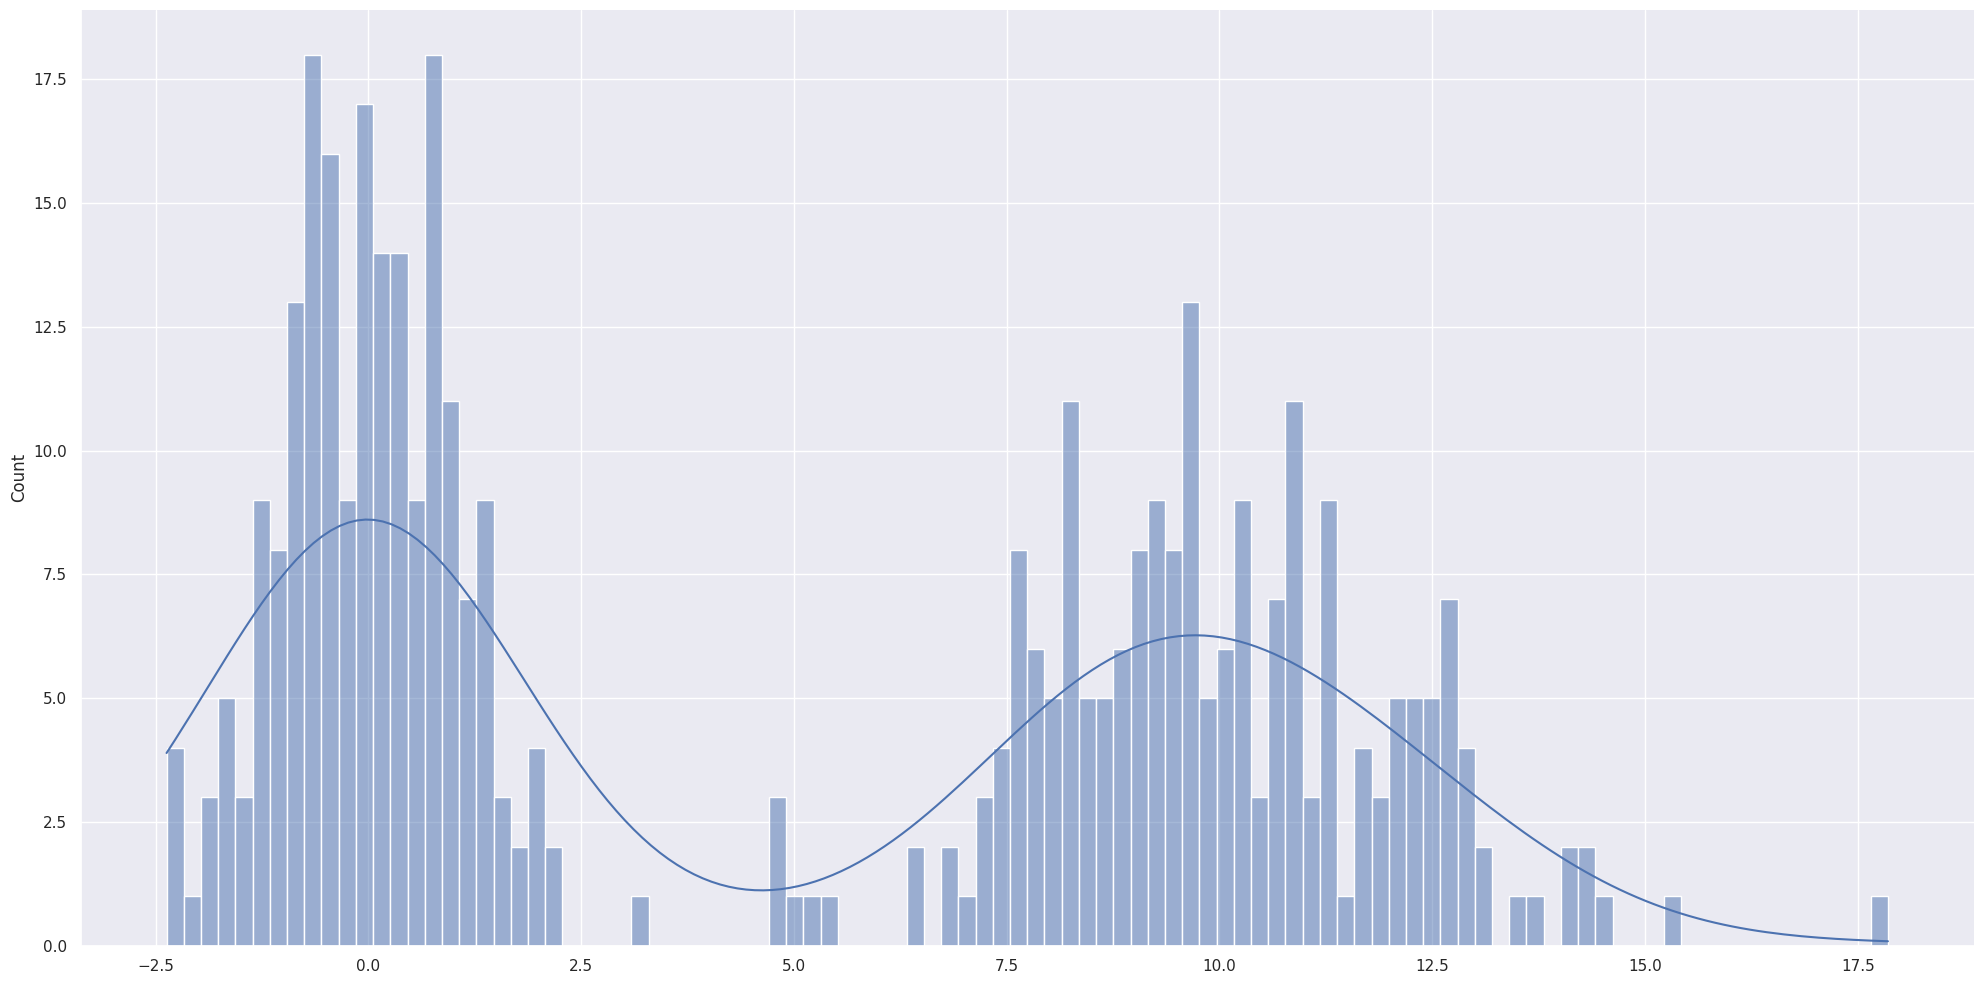

In [88]:
sns.displot(values, bins=100, kde = True, height=10, aspect=2)

#### 예제: 서비스 팁 비율의 히스토그램과 밀도 그래프

In [90]:
data = tips['tip_pct']

<AxesSubplot: xlabel='tip_pct', ylabel='Count'>

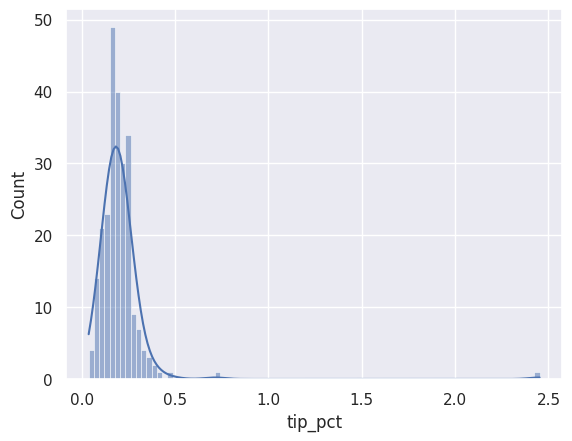

In [94]:
sns.histplot(data, kde=True)

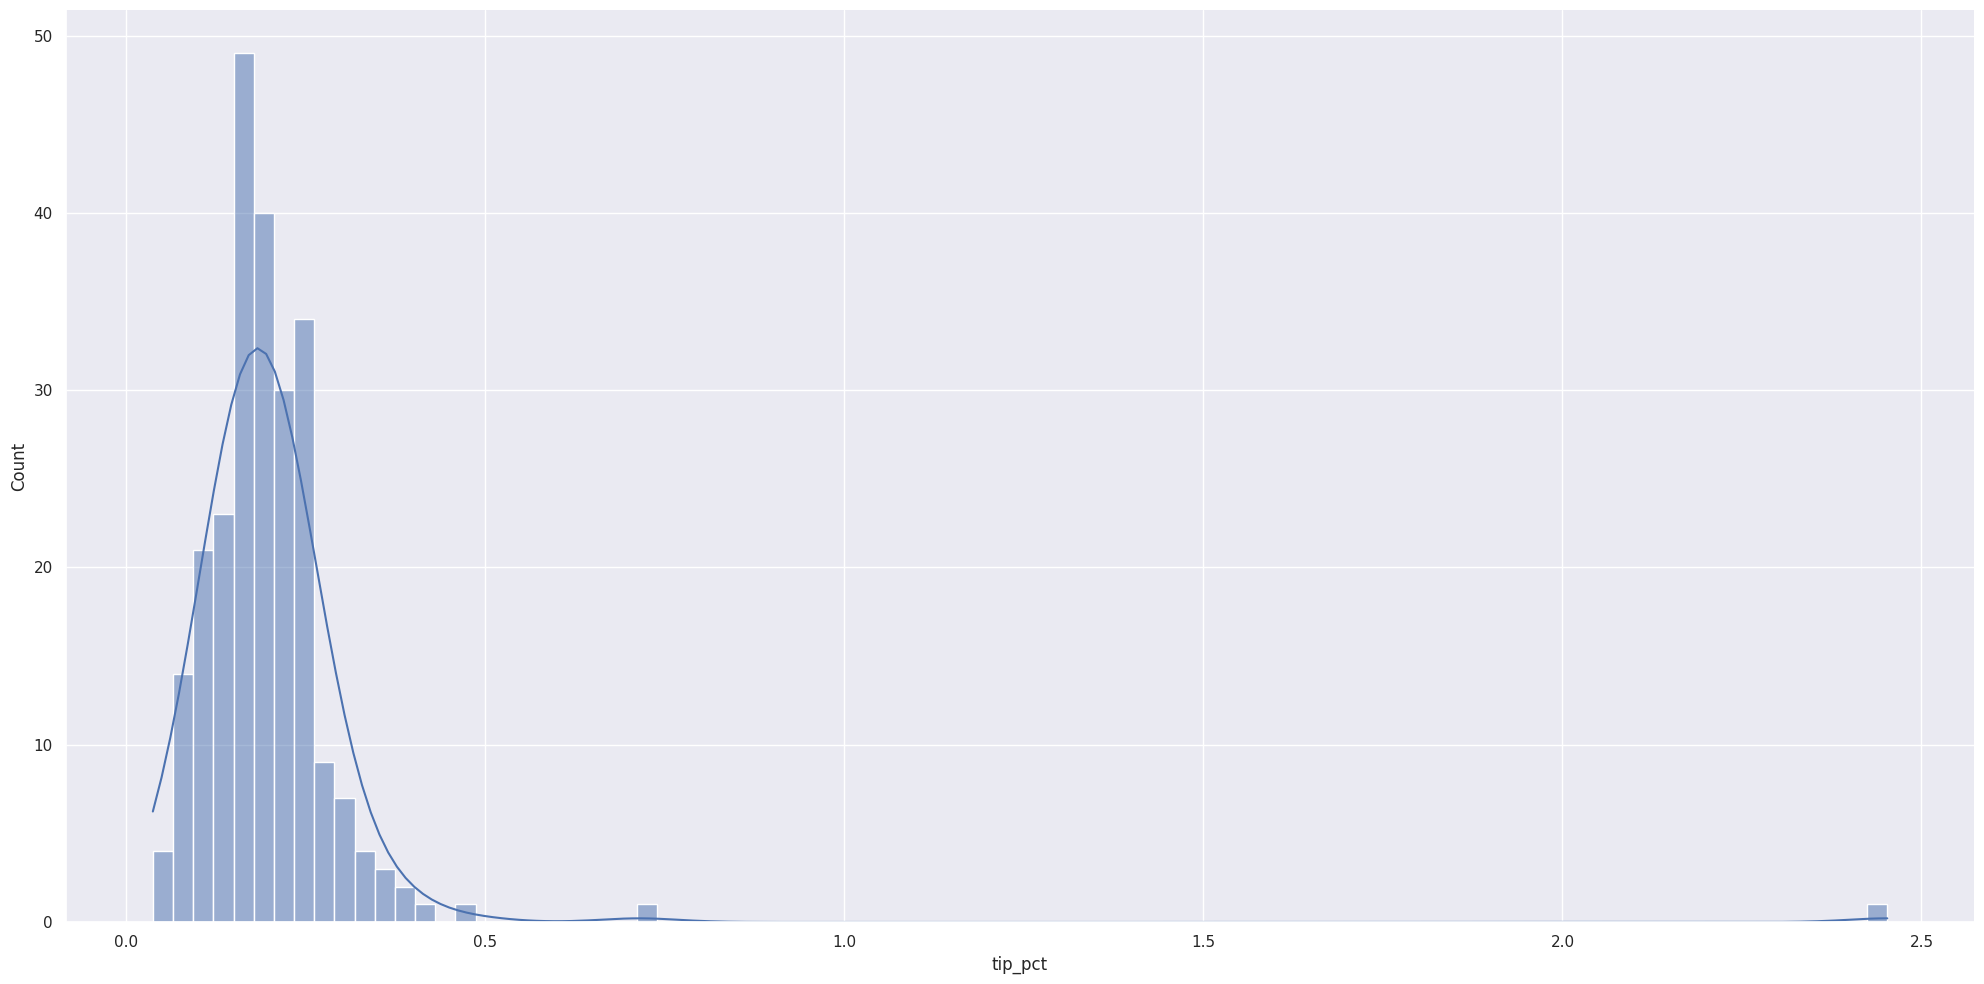

In [96]:
sns.displot(data, kde=True, height=10, aspect=2)

### 산점도
- `statsmodels` 모듈에서 불러온다.

- 1959년부터 2009년까지 미국의 거시경제지표 데이터 사용

In [97]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 33.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 27.1 MB/s eta 0:00:00


In [99]:
import statsmodels.api as sm

macro = sm.datasets.macrodata.load_pandas().data
macro

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


포함된 14개의 경제지표는 다음과 같다.

| 지표 | 설명 |
| :--- | :--- |
| year | 1959년 1분기 - 2009년 3분기 |
| quarter | 1 - 4분기|
| realgdp | 실질 국내총생산 (단위: 억 달러) |
| realcons | 실질 총민간 소비지출 (단위: 억 달러) |
| realinv | 실질 총민간 국내투자 (단위: 억 달러) |
| realgovt | 실질 연방 정부 소비지출 및 국내투자 (단위: 억 달러) |
| realdpi | 실질 가처분 소득 (단위: 억 달러) |
| cpi | 소비자 물가지수 |
| m1 | M1 통화지표 | 
| tbilrate | 3개월 만기 국채 수익률|
| unemp | 실업률 | 
| pop | 인구 |
| infl | 물가상승률 |
| realint | 실질 이자율 |

이중에 네 개의 지표만 이용해서 산점도를 설명한다.

- cpi: 분기별 소비자 물가지수
- m1: M1 통화지수
- tbilrate: 3개월 만기 국채 수익률
- unemp: 실업률

In [100]:
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
data

,cpi,m1,tbilrate,unemp
0,28.980,139.7,2.82,5.8
1,29.150,141.7,3.08,5.1
2,29.350,140.5,3.82,5.3
3,29.370,140.0,4.33,5.6
4,29.540,139.6,3.50,5.2
...,...,...,...,...
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2


시간의 흐름에 따른 변화량
- 사용된 데이터의 척도(scale)을 맞추기 위해 로그값을 취한 후 분기별 변화량을 측정
- `np.log()` 함수: 어레이/데이터프레임의 항목별로 적용되는 유니버설 함수
- `diff()` 메서드: 열별로 이전 행의 항목값과의 차이를 계산함. 
    0번 행이거나 결측치가 사용되었을 경우 결측치로 처리됨.
    `axis=1`로 지정하면 열별 차이를 계산함.
- `dropna()` 메서드: 결측치가 포함된 행 삭제.
    `axis=1`로 지정하면 결측치가 포함된 열 삭제.
    


In [104]:
trans = np.log(data).diff().dropna()

In [105]:
trans

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


#### 산점도와 선형회귀 곡선
- `seaborn.regplot()` 함수는 산점도와 두 데이터 사이의 선형 관계를 보여주는 선형회귀 곡선을 동시에 그린다.

```python
seaborn.regplot(x='m1', y='unemp', data=trans_data)
```

<AxesSubplot: xlabel='m1', ylabel='unemp'>

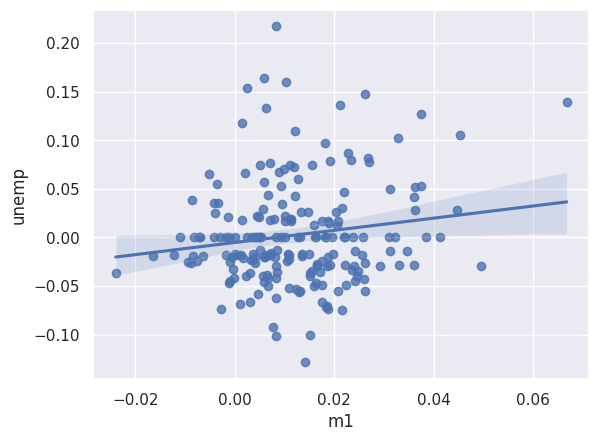

In [107]:
sns.regplot(x="m1", y="unemp", data=trans)

- `m1` 데이터와 `unemp` 데이터 사이의 선형관계가 많이 있어보이지는 않는다. 
- 실제로 두 특성 사이의 상관계수르 확인해 보자

In [109]:
trans_corr = trans.corr()

In [112]:
trans_corr

,cpi,m1,tbilrate,unemp
cpi,1.000000,-0.050535,0.329456,0.019750
m1,-0.050535,1.000000,-0.360278,0.150729
tbilrate,0.329456,-0.360278,1.000000,-0.371491
unemp,0.019750,0.150729,-0.371491,1.000000


`seaborn.heatmap()` 함수를 이용하여 선형관계를 색으로 표현가능

<AxesSubplot: >

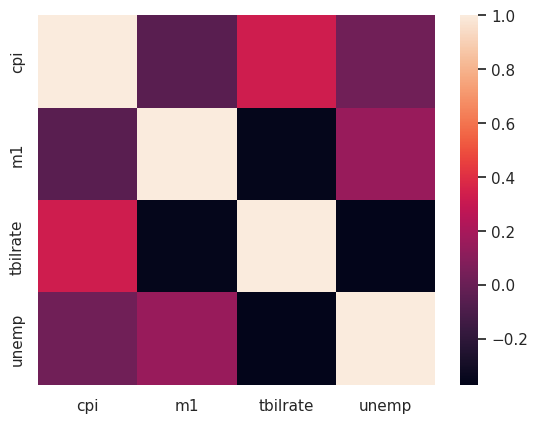

In [110]:
sns.heatmap(trans_corr)

__참고:__ 선형회귀 직선을 보이지 않으려면 `fit_reg=False` 옵션을 사용한다.

<AxesSubplot: xlabel='m1', ylabel='unemp'>

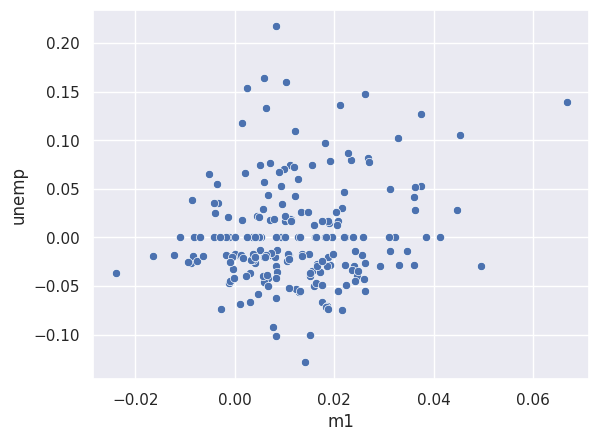

In [111]:
sns.scatterplot(x="m1", y="unemp", data=trans)

`seaborn.regplot()` 
- [참고](https://seaborn.pydata.org/generated/seaborn.regplot.html)

#### 산점도 행렬

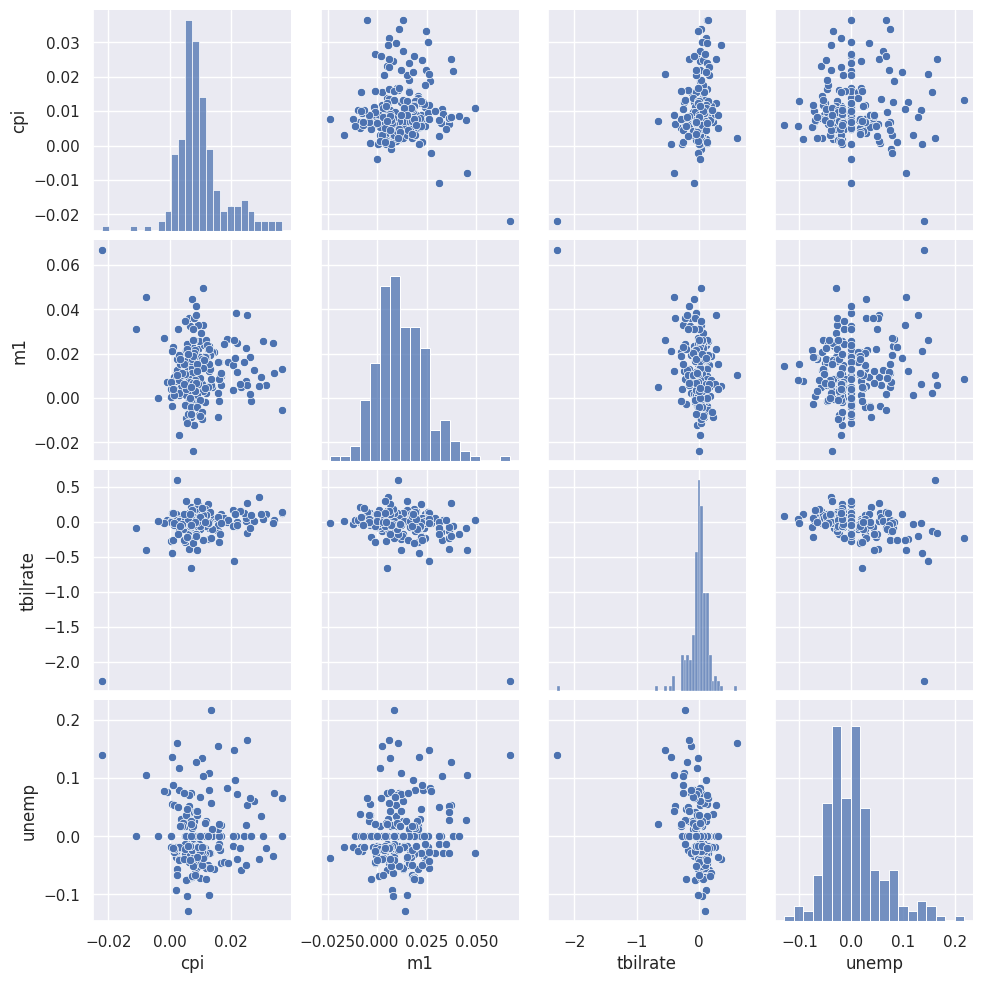

In [113]:
sns.pairplot(trans)

`diag_kind=kde` 옵션을 사용하면 대각선 상에 히스토그램 대신 밀도그래프가 삽입된다.

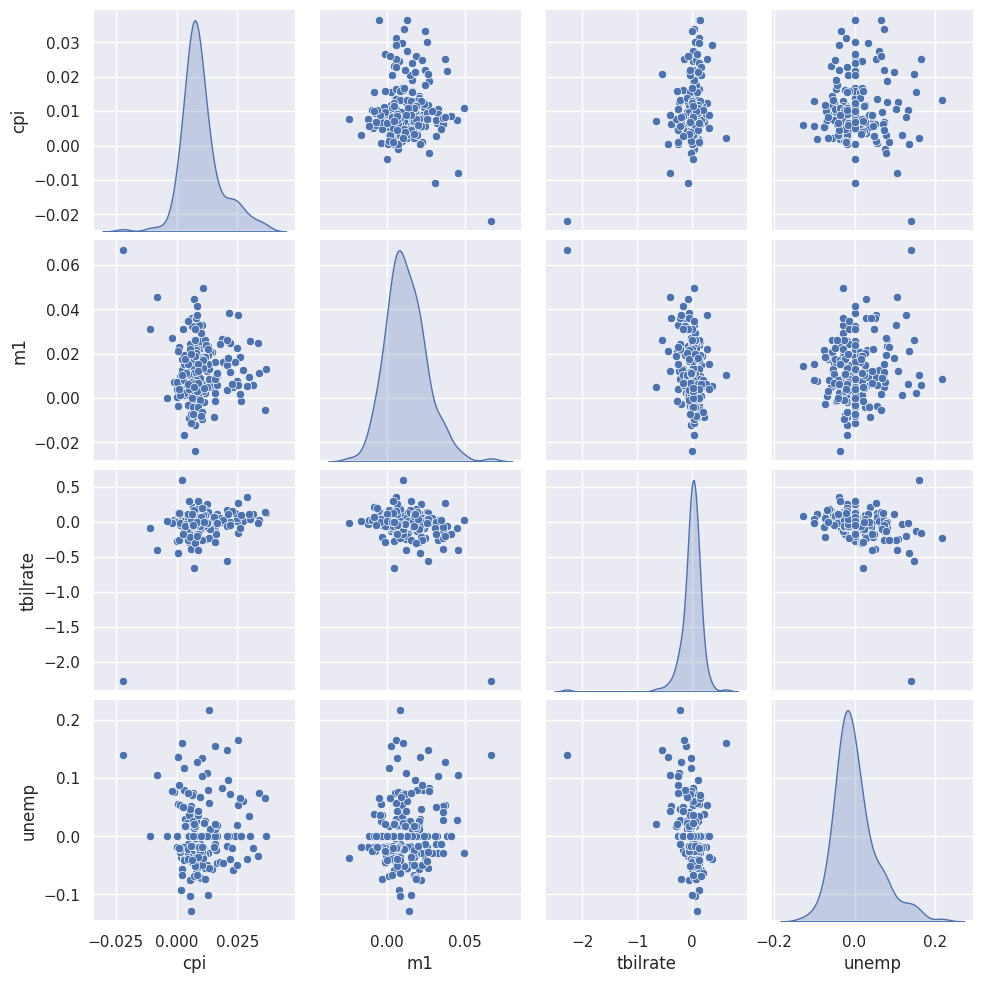

In [115]:
sns.pairplot(trans,diag_kind="kde")

In [ ]:
# bokeh : https://docs.bokeh.org/en/latest/docs/gallery.html
# https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259
# plotly : https://dash.gallery/Portal/?_gl=1*lpc93x*_ga*NzUyMDk0MTEyLjE2NzA0NzY5OTc.*_ga_6G7EE0JNSC*MTY3MDQ3Njk5Ny4xLjEuMTY3MDQ3NzA1Ny4wLjAuMA..